In [30]:
import torch
import torch.nn.functional as F
import numpy as np

In [3]:
words=open("names.txt","r").read().splitlines()

In [4]:
len(words)

32033

In [5]:
chars=sorted(set(''.join(words)))

stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}

In [78]:
xs=[]
ys=[]
for word in words[0:1]:
    chars=["."]+list(word)+["."]
    for ch1,ch2,ch3 in zip(chars[0:],chars[1:],chars[2:]):
        v1=F.one_hot(torch.tensor(stoi[ch1]),num_classes=27).float()
        v2=F.one_hot(torch.tensor(stoi[ch2]),num_classes=27).float()
        l1=torch.hstack((v1,v2))
        xs.append(l1.tolist())
        ys.append(stoi[ch3])

        

In [79]:
xs=torch.tensor(xs)
ys=torch.tensor(ys)
xs

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [80]:
ys

tensor([13, 13,  1,  0])

In [20]:
g=torch.Generator().manual_seed(2147483647)

In [81]:
xs.shape

torch.Size([4, 54])

In [82]:
ys.shape

torch.Size([4])

In [83]:
W=torch.randn((54,27),generator=g, requires_grad=True)

In [84]:
W.shape

torch.Size([54, 27])

In [88]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((54, 27), generator=g, requires_grad=True)
loss_data=[]
##Forward Pass
epochs=100
lr=0.1
for i in range(epochs):
    logits = xs @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    regularization_term=0.01*(W**2).mean()
    loss = -probs[torch.arange(xs.shape[0]), ys].log().mean() + regularization_term
    loss_data.append(loss.item())
    print(f"{i+1}.Epoch => Loss: {loss.item()}")
    W.grad=None # this is more efficient rather than assigning 0
    loss.backward()
    W.data-=lr*W.grad

1.Epoch => Loss: 4.105025291442871
2.Epoch => Loss: 4.051957130432129
3.Epoch => Loss: 3.999122381210327
4.Epoch => Loss: 3.9465255737304688
5.Epoch => Loss: 3.894171714782715
6.Epoch => Loss: 3.842067003250122
7.Epoch => Loss: 3.790215015411377
8.Epoch => Loss: 3.7386221885681152
9.Epoch => Loss: 3.687293291091919
10.Epoch => Loss: 3.636234760284424
11.Epoch => Loss: 3.585452079772949
12.Epoch => Loss: 3.5349509716033936
13.Epoch => Loss: 3.4847371578216553
14.Epoch => Loss: 3.434817314147949
15.Epoch => Loss: 3.385197639465332
16.Epoch => Loss: 3.3358840942382812
17.Epoch => Loss: 3.2868828773498535
18.Epoch => Loss: 3.23820161819458
19.Epoch => Loss: 3.1898458003997803
20.Epoch => Loss: 3.141822338104248
21.Epoch => Loss: 3.09413743019104
22.Epoch => Loss: 3.0467984676361084
23.Epoch => Loss: 2.999811887741089
24.Epoch => Loss: 2.953184127807617
25.Epoch => Loss: 2.9069223403930664
26.Epoch => Loss: 2.8610329627990723
27.Epoch => Loss: 2.815523147583008
28.Epoch => Loss: 2.770398378

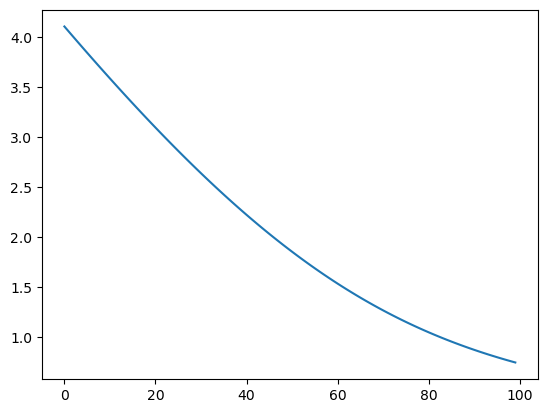

In [89]:
import matplotlib.pyplot as plt

plt.plot(loss_data)
plt.show()

In [102]:
g = torch.Generator().manual_seed(2147483647)
wo="courtney"
for i in range(len(wo)):
    out=[]
    ix=0
    while True:
        xenc=F.one_hot(torch.tensor([ix]),num_classes=54).float()
        logits=xenc @ W
        counts=logits.exp()
        p = counts / counts.sum(1, keepdims=True)
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))

uyt.
axw.
tpojxttszpgschuhqvbmrdjdarmgvmpzfrogbt.
ksmhdkfbllvkfedkrqrjvmarhggwxou.
odct.
edklyucemapcjugrogemlpp.
gdblbcepipmbf.
zuyw.
